In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [2]:
# This function defines the derivative of the two coupled first order diff. eq.

def pendulum(y, t, param):
    theta, omega = y # Unpack the input for easy of use.
    L, g = param
    d_theta = omega # Equation one
    d_omega = -g/L * np.sin(theta) # Equation 2
    
    return ([d_theta, d_omega]) # Return both functions as a list
    

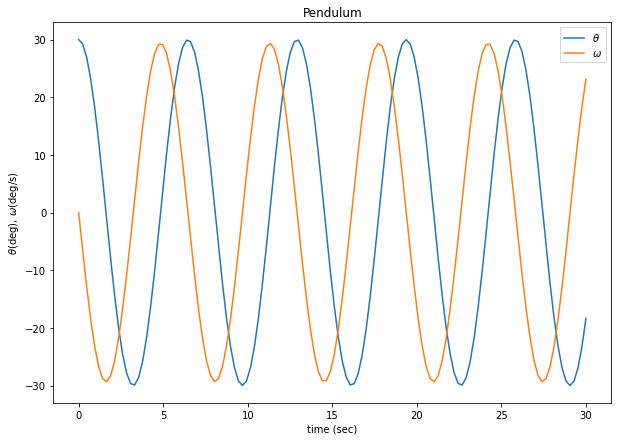

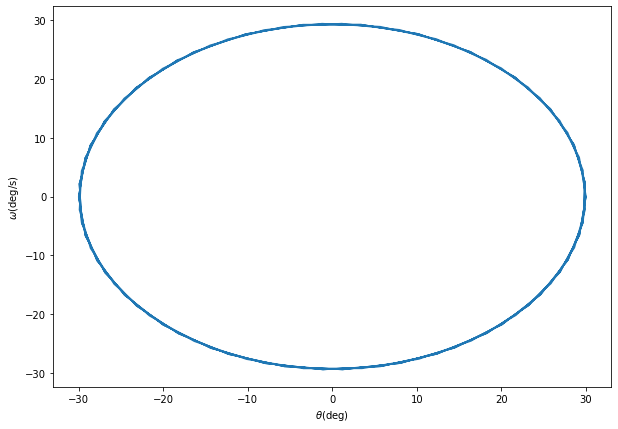

In [6]:
# Problem setup

L = 10.0
g = 9.8 # stay down to earth
parameters = [L, g]

# Initial values
theta0 = 30*np.pi/180
omega0 = 0
y0 = [theta0, omega0]

# Setup the time domain for the solution.
t_end = 30 # 30 seconds
N = 128 # Steps
t = np.linspace(0, t_end, N) # For plotting

# Now ask SciPy to solve the diffeq for us.
solution = spi.odeint(pendulum, y0, t, args = (parameters,)) #最後のカンマ必要！
solutionT = np.transpose(solution) #転置すればプロットに便利

fig1 = plt.figure(figsize = (10, 7))
plt.title("Pendulum")
plt.xlabel("time (sec)")
plt.ylabel("$\\theta$(deg), $\omega$(deg/s)")
plt.plot(t, solutionT[0]*180/np.pi, label = "$\\theta$") #ラジアンから°にしている
plt.plot(t, solutionT[1]*180/np.pi, label = "$\omega$")
plt.legend()
plt.show()
fig2 = plt.figure(figsize = (10, 7))
plt.plot(solutionT[0]*180/np.pi, solutionT[1]*180/np.pi) # 位相空間 theta-omega
plt.xlabel("$\\theta$(deg)")
plt.ylabel("$\omega$(deg/s)")
plt.show()






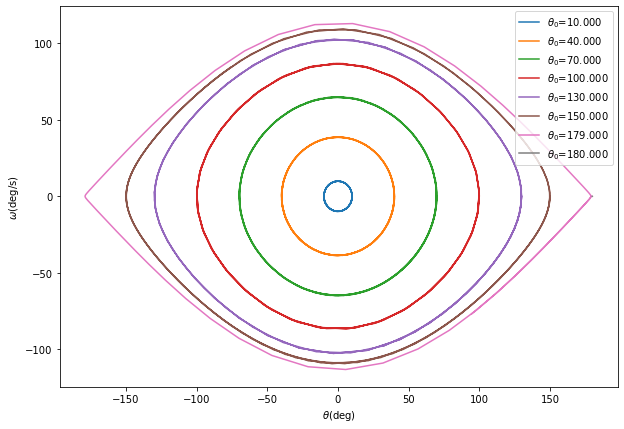

In [22]:
theta0s = np.array([10, 40, 70, 100, 130, 150, 179, 180], dtype = "float")*np.pi/180 # ラジアンにしている

fig2 = plt.figure(figsize = (10, 7))
for theta0 in theta0s: #arrayの要素を最初から最後まで巡る
    y0 = [theta0, omega0]
    solution = spi.odeint(pendulum, y0, t, args=(parameters,))
    solutionT = np.transpose(solution)
    plt.plot(solutionT[0]*180/np.pi, solutionT[1]*180/np.pi, label = f"$\\theta_0$={theta0*180/np.pi:<7.3f}")

plt.xlabel("$\\theta$(deg)")
plt.ylabel("$\omega$(deg/s)")
plt.legend()
plt.show()